In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir('G:/Machine learning/Churn')

In [98]:
df_churn=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [99]:
#display the data
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [100]:
df_churn['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      1
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
7013    0
7014    0
7015    1
7016    0
7017    0
7018    0
7019    0
7020    0
7021    0
7022    0
7023    1
7024    0
7025    0
7026    0
7027    0
7028    0
7029    1
7030    0
7031    1
7032    1
7033    0
7034    0
7035    0
7036    0
7037    0
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [102]:
df_churn['SeniorCitizen'] = df_churn['SeniorCitizen'].map({0:'No',1:'Yes'})

In [103]:
df_churn['SeniorCitizen']

0        No
1        No
2        No
3        No
4        No
5        No
6        No
7        No
8        No
9        No
10       No
11       No
12       No
13       No
14       No
15       No
16       No
17       No
18       No
19       No
20      Yes
21       No
22       No
23       No
24       No
25       No
26       No
27       No
28       No
29       No
       ... 
7013     No
7014     No
7015    Yes
7016     No
7017     No
7018     No
7019     No
7020     No
7021     No
7022     No
7023    Yes
7024     No
7025     No
7026     No
7027     No
7028     No
7029    Yes
7030     No
7031    Yes
7032    Yes
7033     No
7034     No
7035     No
7036     No
7037     No
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object

In [104]:
#drop the customerid
df_churn.drop('customerID',axis=1,inplace=True)

In [105]:


#Replace the churn to 0/1
df_churn['Churn']=df_churn['Churn'].map({'No':'0','Yes':'1'})

In [106]:
#View the datatype
df_churn.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [107]:
df_churn['SeniorCitizen']

0        No
1        No
2        No
3        No
4        No
5        No
6        No
7        No
8        No
9        No
10       No
11       No
12       No
13       No
14       No
15       No
16       No
17       No
18       No
19       No
20      Yes
21       No
22       No
23       No
24       No
25       No
26       No
27       No
28       No
29       No
       ... 
7013     No
7014     No
7015    Yes
7016     No
7017     No
7018     No
7019     No
7020     No
7021     No
7022     No
7023    Yes
7024     No
7025     No
7026     No
7027     No
7028     No
7029    Yes
7030     No
7031    Yes
7032    Yes
7033     No
7034     No
7035     No
7036     No
7037     No
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object

In [108]:
#Cinvert object data type to numeric data type
df_churn['TotalCharges']=pd.to_numeric(df_churn['TotalCharges'],errors='coerce')

In [109]:
#check the datatype
df_churn['TotalCharges'].dtype

dtype('float64')

In [110]:
#Check wehther any null values are there
df_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [111]:
#Drop the missing values
df_churn['TotalCharges']=df_churn['TotalCharges'].dropna()

In [112]:
#Check wehther any null values are there
df_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [126]:
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,0
7,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,0
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1
9,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,0


In [127]:
#Use corrleation matrix to understand the correlation between numeric values
df_corr = df_churn.corr()

sns.set(style="white")



In [128]:
#Create an array of same shape as that of correlation matrix

mask=np.zeros_like(df_corr,dtype=np.bool)
mask

array([[False, False],
       [False, False]])

In [116]:
#Return the indices for the upper-triangle of arr.
mask[np.triu_indices_from(mask)]=True


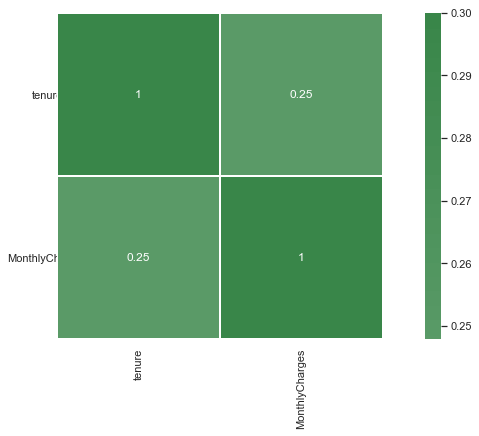

In [129]:
f,ax=plt.subplots(figsize=(15,6))

cmap = sns.diverging_palette(255, 133, as_cmap=True)

sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, annot=True)

plt.xticks(rotation=90,ha="center")
plt.yticks(rotation=0,ha="center")

plt.show()

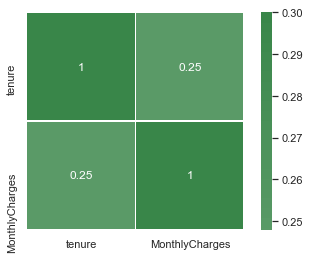

In [130]:
sns.heatmap(df_corr,cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, annot=True)
plt.show()

In [131]:
#the correlation score > 0.5 are 0.65 / 0.83 --Total charges / Tenure -- Monthly charges - Total Charges
#Remove the Total charges
df_churn.drop('TotalCharges', axis=1, inplace=True) 

#check the total charges is removed

df_churn

KeyError: "['TotalCharges'] not found in axis"

In [119]:
df_churn.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype=object)

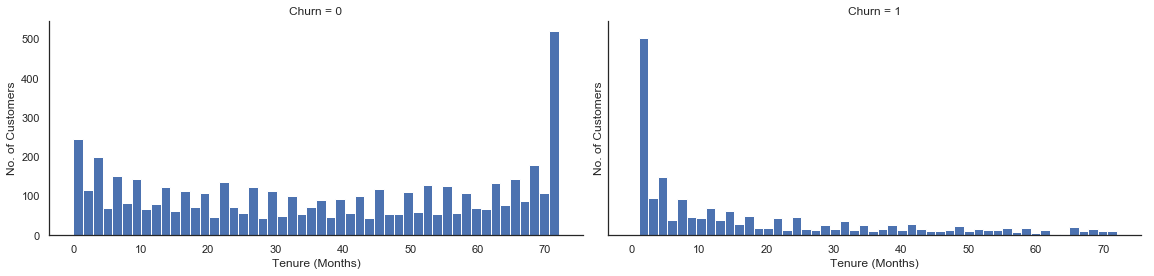

In [120]:
#Distribute the Tenure 

tenure=sns.FacetGrid(data=df_churn, col='Churn', height=4, aspect=2)

tenure.map(plt.hist,'tenure',bins=50)

tenure.set(xlabel='Tenure (Months)',ylabel='No. of Customers')

plt.show()


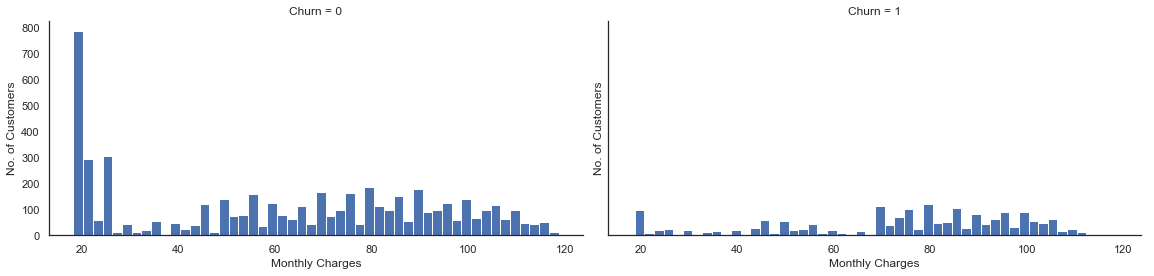

In [121]:
#Distribution of the monthly charges

monthly=sns.FacetGrid(data=df_churn,col='Churn', height=4, aspect=2)

monthly.map(plt.hist,'MonthlyCharges',bins=50)

monthly.set(xlabel='Monthly Charges',ylabel='No. of Customers')

plt.show()


In [122]:
# Customer appears to churn away more when monthly charges are high.
# We can present the plots above more intuitively using Kernel Density Estimate Plot
%matplotlib inline

In [143]:
df_churn['Churn']

'001011001000010000101010001101000000101100000001000101010000000010000000000000001010000000000001010100001000001001000100001000100001011000010100000100010000000001000010100101001100101011000001000000000000000110100000000010010001000010010010000000011001100000101100000010101011100000001001111000000001010000100000001001101000000100000111100100000010000001110010000001000001000001000101011000000000010000100000111000000011000000000010010000000000011000000100000000110000010100110011010010000100100100110000010110001001001000011000000000100000000110100000001000000000000010000100000011100100000000010000000000000111000000000000100001100001001101100110101100100010100000101000101001001000000100000100010000000100001000000000001110001010000000000010000000000001001001100000000111100101000101000000000000010100100011110000101000000110101000100100101010000000000101000011110010000100100010100000010101000010011001000010000100000000001100000100010000000100101000010000000011100110010110100001010000000001110

In [144]:
#Replace the churn to 0/1
df_churn['Churn']=df_churn['Churn'].map({'0':0,'1':1})

In [146]:
df_churn['Churn']==0

0        True
1        True
2       False
3        True
4       False
5       False
6        True
7        True
8       False
9        True
10       True
11       True
12       True
13      False
14       True
15       True
16       True
17       True
18      False
19       True
20      False
21       True
22      False
23       True
24       True
25       True
26      False
27      False
28       True
29      False
        ...  
7013     True
7014     True
7015     True
7016     True
7017     True
7018    False
7019     True
7020     True
7021    False
7022     True
7023     True
7024     True
7025     True
7026    False
7027     True
7028     True
7029     True
7030     True
7031     True
7032    False
7033     True
7034    False
7035     True
7036     True
7037     True
7038     True
7039     True
7040     True
7041    False
7042     True
Name: Churn, Length: 7043, dtype: bool

C:\Users\CCS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


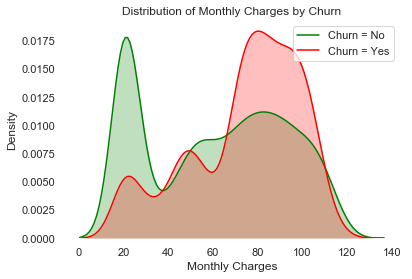

In [147]:
ax=sns.kdeplot(df_churn.MonthlyCharges[(df_churn['Churn']==0)],color="Green",shade=True)

ax=sns.kdeplot(df_churn.MonthlyCharges[(df_churn['Churn']==1)],ax=ax,color="Red",shade=True)

#Set thelabels
ax.set_xlabel("Monthly Charges")
ax.set_ylabel("Density")
ax.set_title("Distribution of Monthly Charges by Churn")
ax.legend(["Churn = No","Churn = Yes"],loc='upper right')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

# figure size in inches
sns.set(rc={'figure.figsize':(7,5)})

In [148]:
# Here it's evident that customers are more likely to churn when the Monthly Charges are high


[None, None, None, None]

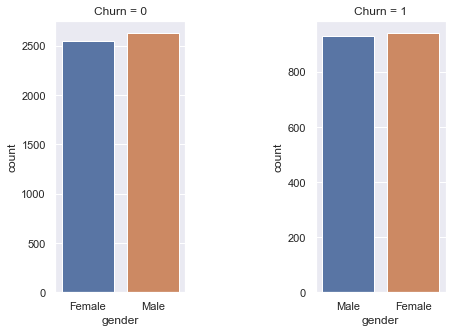

In [149]:
#Review by Gender
#df_churn[df_churn['Churn']==0]
df_churn_y=df_churn[df_churn['Churn']==1]
df_churn_n=df_churn[df_churn['Churn']==0]

fig,ax=plt.subplots(1,2)

fig.subplots_adjust(wspace=1)

sns.countplot(df_churn_n['gender'],ax=ax[0])

ax[0].set_title('Churn = 0')

plt.setp(ax[0].get_xticklabels(),rotation=0,ha="center")

sns.countplot(df_churn_y['gender'],ax=ax[1])

ax[1].set_title('Churn = 1')

plt.setp(ax[1].get_xticklabels(),rotation=0,ha="center")

In [70]:
# The male:female ratio is constant across the customer who have churned away and those who haven't
# Hence, it seems that gender does not have an impact on churn rates

[None, None, None, None, None, None]

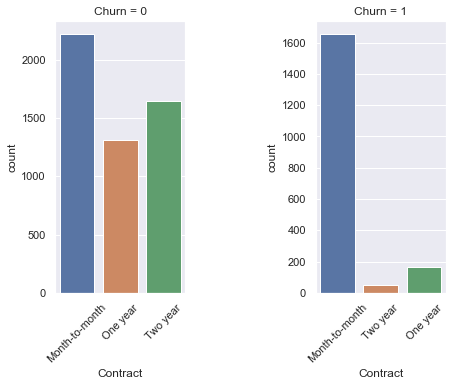

In [151]:
#Contract type
df_churn_y=df_churn[df_churn['Churn']==1]
df_churn_n=df_churn[df_churn['Churn']==0]

fig,ax=plt.subplots(1,2)

fig.subplots_adjust(wspace=1)

sns.countplot(df_churn_n['Contract'],ax=ax[0])

ax[0].set_title('Churn = 0')

plt.setp(ax[0].get_xticklabels(),rotation=45,ha="center")

sns.countplot(df_churn_y['Contract'],ax=ax[1])

ax[1].set_title('Churn = 1')

plt.setp(ax[1].get_xticklabels(),rotation=45,ha="center")


In [ ]:
#People with high month-month contract leaving the service

[None, None, None, None]

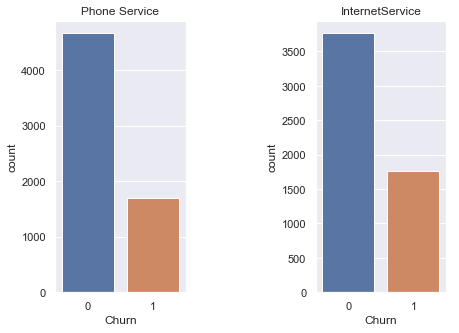

In [154]:
# Phone Service and Internet Service
df_phone = df_churn[df_churn['PhoneService']=='Yes']
df_internet = df_churn[df_churn['InternetService']!='No']

fig,ax=plt.subplots(1,2)

fig.subplots_adjust(wspace=1)

sns.countplot(df_phone['Churn'],ax=ax[0])

ax[0].set_title('Phone Service')

plt.setp(ax[0].get_xticklabels(),rotation=0,ha="center")

sns.countplot(df_internet['Churn'],ax=ax[1])

ax[1].set_title('InternetService')

plt.setp(ax[1].get_xticklabels(),rotation=0,ha="center")



In [ ]:
# Among the users of Phone and Internet Service, the proportions of the customers churning are pretty close


[None, None, None, None]

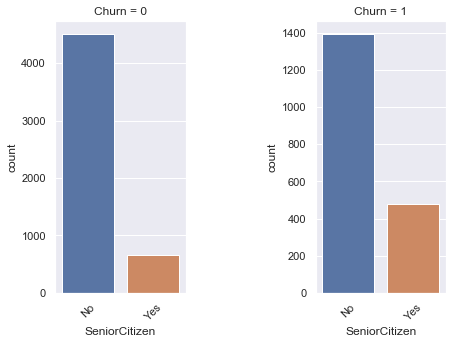

In [155]:
#Senior Citizens
df_churn_y=df_churn[df_churn['Churn']==1]
df_churn_n=df_churn[df_churn['Churn']==0]

fig,ax=plt.subplots(1,2)

fig.subplots_adjust(wspace=1)

sns.countplot(df_churn_n['SeniorCitizen'],ax=ax[0])

ax[0].set_title('Churn = 0')

plt.setp(ax[0].get_xticklabels(),rotation=45,ha="center")

sns.countplot(df_churn_y['SeniorCitizen'],ax=ax[1])

ax[1].set_title('Churn = 1')

plt.setp(ax[1].get_xticklabels(),rotation=45,ha="center")


[None, None, None, None]

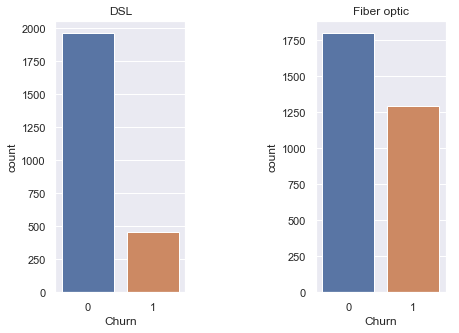

In [156]:
# Phone Service and Internet Service
df_phone = df_churn[df_churn['InternetService']=='DSL']
df_internet = df_churn[df_churn['InternetService']=='Fiber optic']

fig,ax=plt.subplots(1,2)

fig.subplots_adjust(wspace=1)

sns.countplot(df_phone['Churn'],ax=ax[0])

ax[0].set_title('DSL')

plt.setp(ax[0].get_xticklabels(),rotation=0,ha="center")

sns.countplot(df_internet['Churn'],ax=ax[1])

ax[1].set_title('Fiber optic')

plt.setp(ax[1].get_xticklabels(),rotation=0,ha="center")

In [ ]:
# It is  visible that the proportion of customers churning is higher the users of the Fiber optic internet


Text(0,0.5,'Monthly Charges ($)')

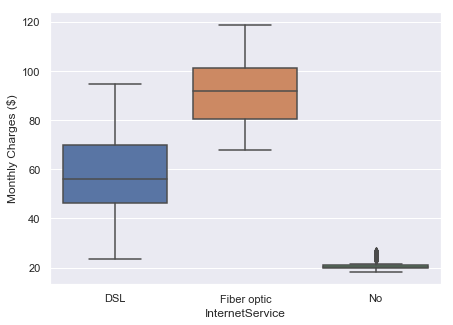

In [161]:
# let's check the prices of the DSL and Fiber Optic Internet Services using boxplot

#df_dsl_fiber=df_churn[df_churn['InternetService']=='DSL']

dsl=sns.boxplot(x=df_churn['InternetService'],y=df_churn['MonthlyCharges'])

dsl.set_ylabel('Monthly Charges ($)')

In [ ]:
# Fiber optic services are more expensive than the DSL services 

In [165]:
#Tenure is a continous variable. 
#convert those into bins to better understand the variation
df_churn['tenure'].min()
df_churn['tenure'].max()

72

In [166]:
bins = [0,6,12,18,24,36,48,60,72,84]
df_churn['Tenure_grouped']=pd.cut(df_churn['tenure'],bins)
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Tenure_grouped
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,"(0, 6]"
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0,"(24, 36]"
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,"(0, 6]"
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,"(36, 48]"
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,"(0, 6]"


In [167]:
# Removing the continuous version of tenure

df_churn.drop('tenure', axis=1, inplace=True)
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Tenure_grouped
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,"(0, 6]"
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0,"(24, 36]"
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,"(0, 6]"
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,"(36, 48]"
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,"(0, 6]"


In [179]:
df_churn.dtypes 

gender                object
SeniorCitizen         object
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
Churn                  int64
Tenure_grouped      category
dtype: object

In [170]:
# Converting the categorical variables into dummy variables
#If columns is None then all the columns with object or category dtype will be converted
df_dummy=pd.get_dummies(df_churn,drop_first=True)
df_dummy.head()

,MonthlyCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,"Tenure_grouped_(6, 12]","Tenure_grouped_(12, 18]","Tenure_grouped_(18, 24]","Tenure_grouped_(24, 36]","Tenure_grouped_(36, 48]","Tenure_grouped_(48, 60]","Tenure_grouped_(60, 72]","Tenure_grouped_(72, 84]"
0,29.85,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,56.95,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,53.85,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,42.30,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,70.70,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [175]:
df_updated_model=df_dummy

In [173]:
df_dummy.columns

Index(['MonthlyCharges', 'Churn', 'gender_Male', 'SeniorCitizen_Yes',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Tenure_grouped_(6, 12]', 'Tenure_grouped_(12, 18]',
       'Tenure_grouped_(18, 24]', 'Tenure_grouped_(24, 36]',
       'Tenure_grouped_(36, 48]', 'Tenure_g

In [176]:
# Splitting the data into train and test datasets
# Test will 30% of the orginal dataframe

y = df_updated_model['Churn']
X = df_updated_model.drop('Churn', axis=1, inplace=False)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [177]:
#check the size and shapes
y.shape

(7043,)

In [178]:
X.shape

(7043, 36)

In [181]:
#Implement the logistic regression
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

#fit the model
logreg.fit(X_train,y_train)

C:\Users\CCS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [183]:
#Use the ROC / AUC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_predict=logreg.predict(X_test)

#Prduce the ROC curve

logreg_roc_auc = roc_auc_score(y_test,y_predict)

print("ROC Score:",logreg_roc_auc )

ROC Score: 0.7059344136875783


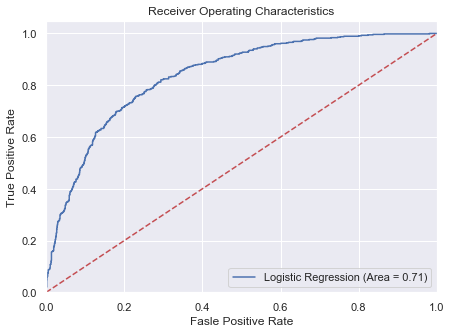

In [184]:
fpr, tpr, thresholds = roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' % logreg_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

In [185]:
from sklearn.metrics import confusion_matrix
confusion_matrix_logreg = confusion_matrix(y_test,y_predict)
confusion_matrix_logreg

array([[1407,  153],
       [ 271,  282]], dtype=int64)

In [187]:
from sklearn.metrics import classification_report
classify_logreg = classification_report(y_test, y_predict)
print(classify_logreg)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1560
           1       0.65      0.51      0.57       553

   micro avg       0.80      0.80      0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



AxesSubplot(0.125,0.125;0.775x0.755)


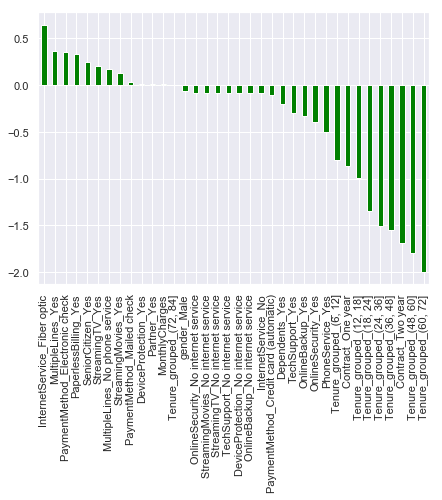

In [188]:
#Weights of the variables
logweights = pd.Series(logreg.coef_[0], index=X.columns.values)
weight_logreg = logweights.sort_values(ascending = False)[:36].plot(kind='bar', color='green')
print (weight_logreg)

In [ ]:
# The weights of the variables aligns with the exploratory analysis
# 1. Fiber optic internet service is associated with higher churn rates
# 2. Seniority of the people have a positive relation with churn rates
# 3. Longer tenures have a negative realtionship with churn rates
# 4. Chrun rates diminishes with additional services such as Online backup, Online Security, and Tech support

In [189]:
# Now we will compare the performance of the logistic regression model with those of others
# 1. Decision Tree
# 2. Random Forest
# 3. KNN

In [190]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

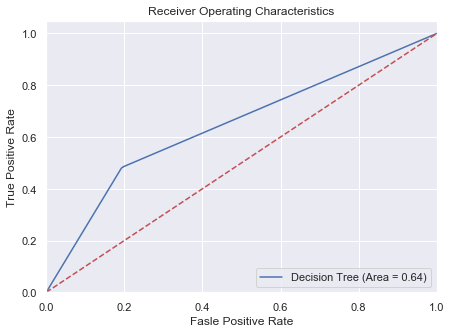

In [192]:
y_pred_dectree = dectree.predict(X_test)

dectree_roc_auc = roc_auc_score(y_test,y_pred_dectree)
fpr, tpr, thresholds = roc_curve(y_test,dectree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (Area = %0.2f)' % dectree_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('DEC_ROC')
plt.show()

In [193]:
classify_dectree = classification_report(y_test, y_pred_dectree)
print(classify_dectree)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1560
           1       0.47      0.48      0.47       553

   micro avg       0.72      0.72      0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.72      0.72      2113



In [194]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=100, random_state=0)
ranfor.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

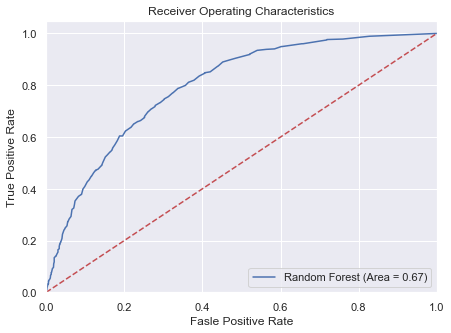

In [195]:
y_pred_ranfor = ranfor.predict(X_test)

ranfor_roc_auc = roc_auc_score(y_test,y_pred_ranfor)
fpr, tpr, thresholds = roc_curve(y_test,ranfor.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (Area = %0.2f)' % ranfor_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [196]:
classify_ranfor = classification_report(y_test, y_pred_ranfor)
print(classify_ranfor)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1560
           1       0.58      0.45      0.51       553

   micro avg       0.77      0.77      0.77      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113



In [199]:
#K neighbours classifier

neighbors=np.arange(1,9)

train_accuracy=np.empty((len(neighbors)))
test_accuracy=np.empty((len(neighbors)))

from sklearn.neighbors import KNeighborsClassifier

for i,k in enumerate(neighbors):
    
    knn=KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute the test accuracy
    test_accuracy[i] = knn.score(X_test, y_test)


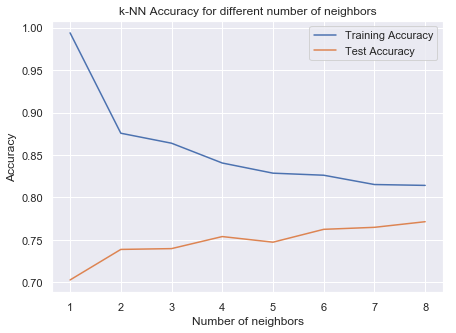

In [201]:
#Plot the charts
plt.title('k-NN Accuracy for different number of neighbors')

plt.plot(neighbors,train_accuracy,label="Training Accuracy")
plt.plot(neighbors,test_accuracy,label="Test Accuracy")

plt.legend()

plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [202]:
# The accuracy is maximum for n = 8

In [203]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

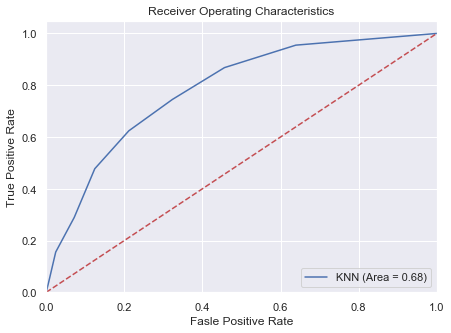

In [204]:

y_pred_knn = knn.predict(X_test)

knn_roc_auc = roc_auc_score(y_test,y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test,knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (Area = %0.2f)' % knn_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [205]:
classify_knn = classification_report(y_test, y_pred_knn)
print(classify_knn)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1560
           1       0.58      0.48      0.52       553

   micro avg       0.77      0.77      0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



In [206]:

# Comparing performance of the 4 models

performance = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K Nearest Neighbors'], 
               'Accuracy (%)': [80, 72,78, 77], 
               'Sensitivity (%)': [52, 49, 47, 48], 
               'Specificity (%)': [91, 81, 89, 87]
              }
perf = pd.DataFrame(data=performance)
perf

,Accuracy (%),Model,Sensitivity (%),Specificity (%)
0,80,Logistic Regression,52,91
1,72,Decision Tree,49,81
2,78,Random Forest,47,89
3,77,K Nearest Neighbors,48,87


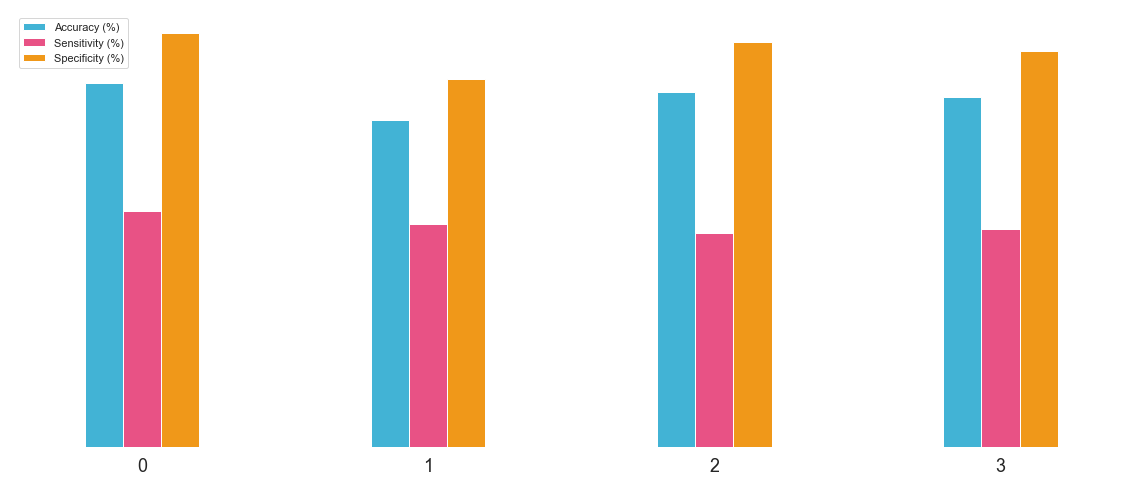

In [218]:
#sns.set_style(style='white')

ax=perf.plot(kind='bar',figsize=(20,8), width=0.4, color=['#42b3d5', '#e85285', '#f09819'], fontsize=18)

ax.legend(loc="best")

plt.xticks(rotation=0,ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(False)
ax.spines['bottom'].set_linewidth(False)
#ax.spines['bottom'].set_linewdith(False)
ax.get_yaxis().set_visible(False)

        
        
    


TypeError: unsupported operand type(s) for -: 'str' and 'int'

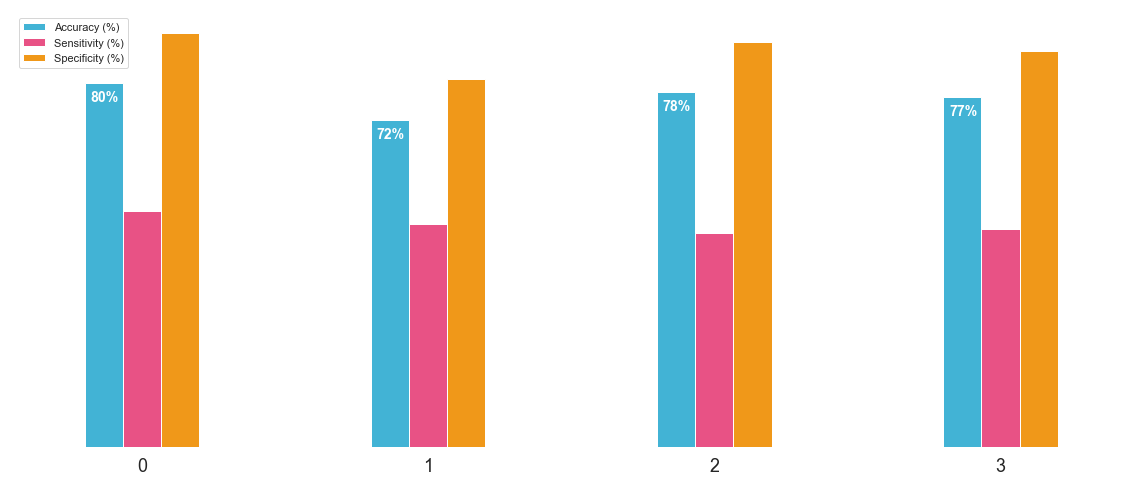